  # Predicting the mood of the person based on the song he /she is listening to
  
  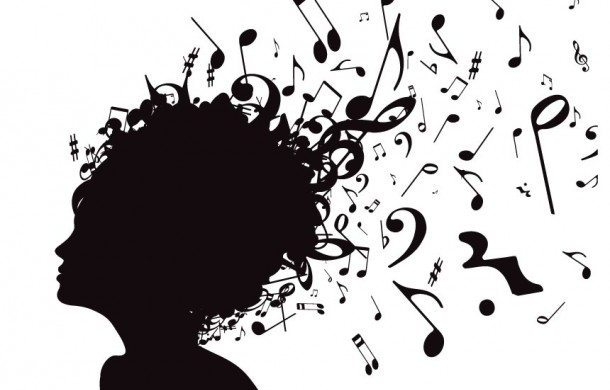
        The model will try to cluster the songs based on their features into    different groups .Then based on the song the person is listening to the model will try to classify the emotion group that song belonged to.In this way the model would be able to know the mood of the listener.





# New Section

## Importing the necessary libraries

In [1]:
## For storing the data into dataframes and all
import pandas as pd
## For numerical computations
import numpy as np
## For visualising purpose
import matplotlib.pyplot as plt
# To make this notebook's output stable across runs
np.random.seed(42)
## For visualisation purpose
import seaborn as sns
import warnings
## For exporting model
import pickle
## For Speech to Text conversion
import speech_recognition as sr

## Importing the dataset

In [2]:
songs = pd.read_csv("data.csv")
songs.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [4]:
songs.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Exploratory Data Analysis

In [5]:
# Checking the correlation between different features
corr_metrics=songs.corr()
corr_metrics.style.background_gradient()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


In [6]:
# Removing the unwanted columns 
features=songs.drop(columns=["song_title","artist","Unnamed: 0"])
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [7]:
features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Feature Scaling

In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


loudness = features[['loudness']].values
key = features[['key']].values
tempo = features[['tempo']].values
time_signature = features[['time_signature']].values
duration_ms = features[['duration_ms']].values


features[['loudness']] = min_max_scaler.fit_transform(loudness)
features[['key']] = min_max_scaler.fit_transform(key)
features[['tempo']]= min_max_scaler.fit_transform(tempo)
features[['time_signature']]= min_max_scaler.fit_transform(time_signature)
features[['duration_ms']] = min_max_scaler.fit_transform(duration_ms)

In [9]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,0.190735,0.434,0.021900,0.181818,0.1650,0.741141,1,0.4310,0.596033,0.75,0.286,1
1,0.1990,0.743,0.314481,0.359,0.006110,0.090909,0.1370,0.692162,1,0.0794,0.654474,0.75,0.588,1
2,0.0344,0.838,0.171624,0.412,0.000234,0.181818,0.1590,0.791369,1,0.2890,0.158539,0.75,0.173,1
3,0.6040,0.494,0.185488,0.338,0.510000,0.454545,0.0922,0.544709,1,0.0261,0.225162,0.75,0.230,1
4,0.1800,0.678,0.381202,0.561,0.512000,0.454545,0.4390,0.654132,0,0.0694,0.735659,0.75,0.904,1


## Performing Feature Reduction

### Dimension Reduction as with the help of this graph we can see the features having high variance

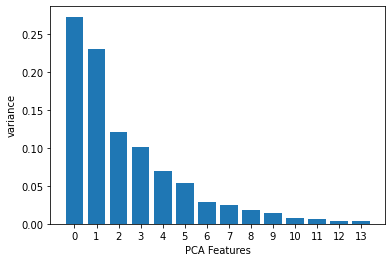

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)
xfeatures = range(pca.n_components_)
plt.bar(xfeatures,pca.explained_variance_)
plt.xticks(xfeatures)
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.show()

#### From above we can see Maximum information is retained by the features have high variance so in this case five features are having high variance so we can remove the unwanted features

In [11]:
features=features.drop(columns=["duration_ms","energy","instrumentalness","key","mode","tempo","time_signature","valence","target"])
features.head()

,acousticness,danceability,liveness,loudness,speechiness
0,0.0102,0.833,0.1650,0.741141,0.4310
1,0.1990,0.743,0.1370,0.692162,0.0794
2,0.0344,0.838,0.1590,0.791369,0.2890
3,0.6040,0.494,0.0922,0.544709,0.0261
4,0.1800,0.678,0.4390,0.654132,0.0694


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>, <AxesSubplot:>]],
      dtype=object)

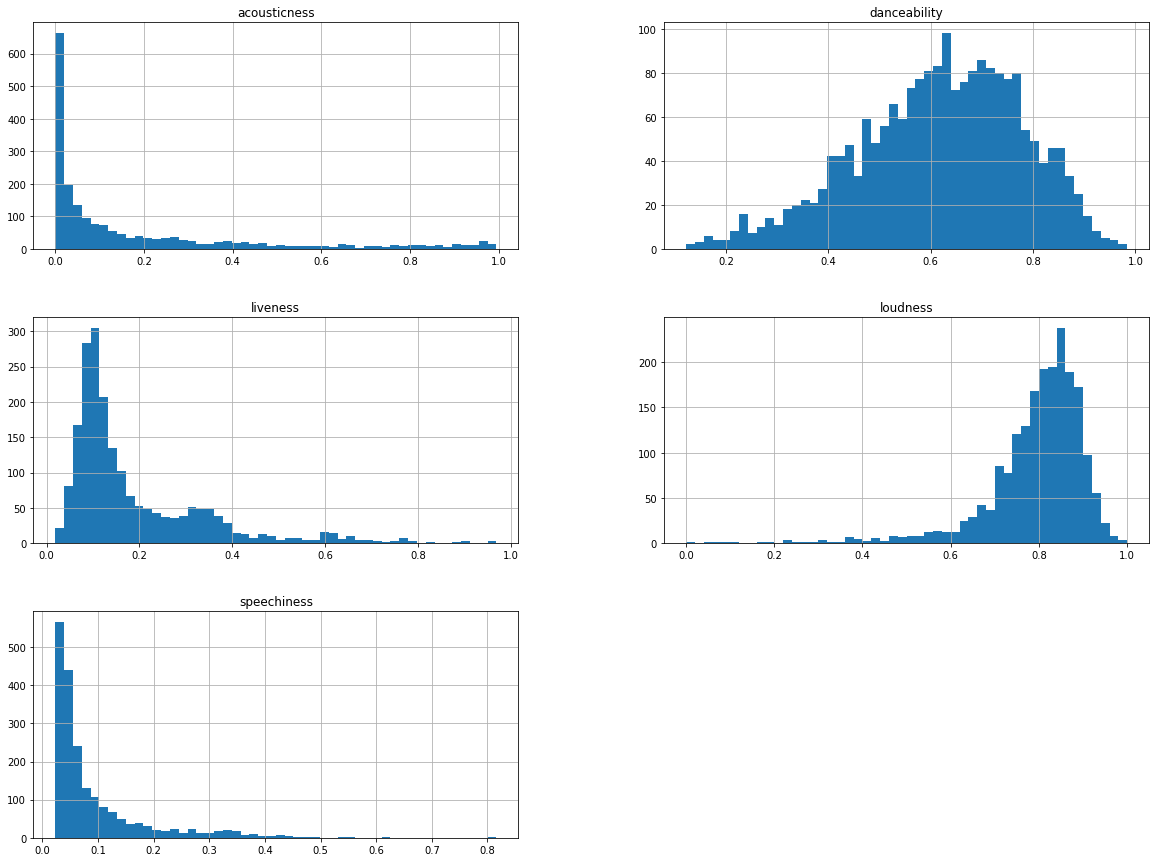

In [12]:
features.hist(bins=50,figsize=(20,15))

# Now we will try to cluster the songs on the basis of emotion of the songs

In [13]:
## We will be KMeans for clustering for that first we need to know the optimum number of clusters
from sklearn.cluster import KMeans
#Within Cluster Sum Of Square to evaluate the efficiency of a model
wcss = []

## Now we will try predicting values using different number of clusters and store the result in wcss array


In [14]:
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=42,max_iter=300)
    km = km.fit(features)
    wcss.append(km.inertia_)

In [15]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4824337334937478)
For n_clusters = 3, silhouette score is 0.28933487266645563)
For n_clusters = 4, silhouette score is 0.26182945023659737)
For n_clusters = 5, silhouette score is 0.2700455308011331)
For n_clusters = 6, silhouette score is 0.25900596298589357)
For n_clusters = 7, silhouette score is 0.2562116727768139)
For n_clusters = 8, silhouette score is 0.2216119137404237)
For n_clusters = 9, silhouette score is 0.23271911186600394)
For n_clusters = 10, silhouette score is 0.23422433999549527)
For n_clusters = 11, silhouette score is 0.22709473702842314)
For n_clusters = 12, silhouette score is 0.22831843105593103)
For n_clusters = 13, silhouette score is 0.19528862666729244)
For n_clusters = 14, silhouette score is 0.22836265202621625)


## Plotting the wcss against number of clusters to determine optimal number of clusters

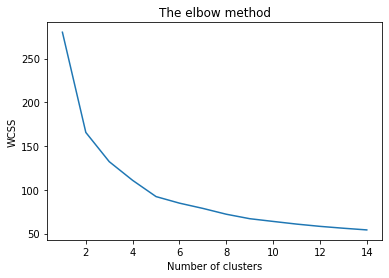

In [16]:
# Plotting the results onto a line graph, 
plt.plot(K, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
# Within cluster sum of squares
plt.ylabel('WCSS')
plt.show()

### The graph reduces drastically at 4, so the optimal number of clusters seems to be 4 a while silhouette_score was giving a better value with 4

In [17]:
## Standardize the data and fit that standardized data to KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)


In [18]:
## Made a pipeline to perform these tasks together
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,KMeans(n_clusters=4,init='k-means++',random_state=3222,max_iter=300))
pipeline.fit(features)
labels = pipeline.predict(features)
label_df = pd.DataFrame(labels)
np.shape(label_df)
features[['cluster_labels']] = label_df
features[['song_title']] = songs[['song_title']]
features[['artist']] = songs[['artist']]
features.head(10)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
0,0.01020,0.833,0.1650,0.741141,0.4310,3,Mask Off,Future
1,0.19900,0.743,0.1370,0.692162,0.0794,0,Redbone,Childish Gambino
2,0.03440,0.838,0.1590,0.791369,0.2890,3,Xanny Family,Future
3,0.60400,0.494,0.0922,0.544709,0.0261,2,Master Of None,Beach House
4,0.18000,0.678,0.4390,0.654132,0.0694,1,Parallel Lines,Junior Boys
5,0.00479,0.804,0.1640,0.805581,0.1850,3,Sneakin’,Drake
6,0.01450,0.739,0.2070,0.667673,0.1560,0,Childs Play,Drake
7,0.02020,0.266,0.1600,0.655322,0.0371,0,Gyöngyhajú lány,Omega
8,0.04810,0.603,0.3420,0.898780,0.3470,3,I've Seen Footage,Death Grips
9,0.00208,0.836,0.5710,0.771729,0.2370,1,Digital Animal,Honey Claws


## Performing Dimensionality Reduction for properly visualizing the data

In [19]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
yfeatures = features.iloc[:,0:5]
kmeans.fit(yfeatures)
y_kmeans = kmeans.predict(yfeatures)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(yfeatures)

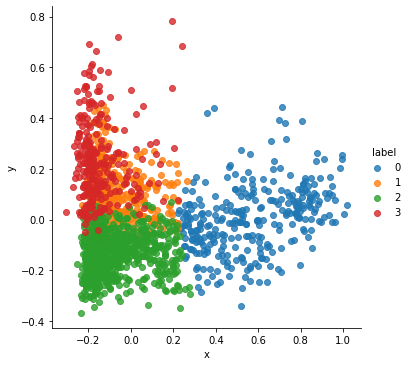

In [20]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [21]:
#Explained variance ratio will return the value for components
pca.explained_variance_ratio_

array([0.53393903, 0.20432391])

In [22]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=yfeatures.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.944877     -0.153574 -0.095453 -0.269430    -0.043790
PC-2     -0.036965     -0.746174  0.660915  0.065866    -0.026653


# Figuring out what the different clusters contain

In [23]:
#Counting the number of songs in each cluster
features = features.sample(frac=1)
features['cluster_labels'].value_counts()

0    1200
1     352
2     239
3     226
Name: cluster_labels, dtype: int64

In [24]:
#Analysing the first cluster
features[features['cluster_labels']==0].head()

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
38,0.012800,0.747,0.1260,0.852699,0.1260,0,7/11,Beyoncé
461,0.000022,0.657,0.0525,0.865477,0.0297,0,Danger! High Voltage (Soulchild Radio Mix),Electric Six
695,0.029600,0.907,0.1050,0.745349,0.0549,0,Music Is the Answer - Original Extended 12-Inc...,Celeda
1246,0.199000,0.422,0.1890,0.789814,0.0306,0,I Have This Hope,Tenth Avenue North
337,0.011500,0.820,0.0820,0.752364,0.0361,0,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang


In [25]:
features[features['cluster_labels']==0].mean()

acousticness      0.111980
danceability      0.648952
liveness          0.126449
loudness          0.813033
speechiness       0.063902
cluster_labels    0.000000
dtype: float64

In [26]:
#Analysing the second cluster
features[features['cluster_labels']==1].head()

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
989,0.001900,0.468,0.409,0.854254,0.0570,1,Five Seconds,Twin Shadow
233,0.077800,0.729,0.382,0.816072,0.0708,1,Sanctified,Rick Ross
993,0.055900,0.521,0.267,0.910704,0.0336,1,Never Saw The Point,Cults
688,0.093800,0.874,0.409,0.818146,0.1020,1,Shabba,A$AP Ferg
123,0.000758,0.695,0.302,0.907777,0.1930,1,Movin' Bass - GTA Remix,Rick Ross


In [27]:
features[features['cluster_labels']==1].mean()

acousticness      0.061627
danceability      0.544060
liveness          0.444972
loudness          0.850135
speechiness       0.087751
cluster_labels    1.000000
dtype: float64

In [28]:
#Analysing the third cluster
features[features['cluster_labels']==2].head()

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
1554,0.960,0.411,0.0640,0.300915,0.0414,2,Where Do You Start,Brad Mehldau Trio
1784,0.789,0.764,0.0997,0.765996,0.0643,2,Simple Love Song,Anuhea
822,0.666,0.827,0.1230,0.673681,0.0352,2,Black Boy,Pops Staples
1528,0.988,0.479,0.1030,0.572675,0.0351,2,I Got It Bad,Enrico Pieranunzi
1536,0.921,0.445,0.1310,0.478652,0.0374,2,It Never Entered my Mind,Mulgrew Miller


In [29]:
features[features['cluster_labels']==2].mean()

acousticness      0.766538
danceability      0.505531
liveness          0.151328
loudness          0.605591
speechiness       0.046080
cluster_labels    2.000000
dtype: float64

In [30]:
#Analysing the third cluster
features[features['cluster_labels']==3].head()

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
141,0.00102,0.798,0.0271,0.816163,0.263,3,Gold and a Pager,The Cool Kids
1497,0.24200,0.592,0.0715,0.907685,0.366,3,Go For Broke (feat. James Arthur),Machine Gun Kelly
1804,0.12200,0.498,0.1060,0.828332,0.310,3,Dear No One,Tori Kelly
1962,0.05880,0.653,0.1940,0.816529,0.211,3,Mysterious Girl,Peter Andre
1181,0.33000,0.736,0.0898,0.659805,0.425,3,Location,Khalid


In [31]:
features[features['cluster_labels']==3].mean()

acousticness      0.172998
danceability      0.691518
liveness          0.178742
loudness          0.798253
speechiness       0.302301
cluster_labels    3.000000
dtype: float64

In [32]:
## On analysing the mean feature values of the clusters following mood can be assigned to a song belonging to the particular clusterfeatures[features['cluster_labels']==0]:
mapping={0 : "Feeling energetic",1 : "Feeling Happy", 2:"Feeling passionate",3: "Feeling Calm"}
features['cluster_labels'] = [mapping[i] for i in features['cluster_labels']]
features.tail()



,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
2004,0.0969,0.595,0.1020,0.938030,0.3640,Feeling Calm,Phone Down - Dodge & Fuski Remix,Lost Kings
1194,0.5550,0.635,0.0970,0.861086,0.2580,Feeling Calm,Trumpets,Jason Derulo
780,0.0505,0.794,0.0562,0.786307,0.4200,Feeling Calm,Hot N*gga,Bobby Shmurda
1361,0.4980,0.587,0.1060,0.789418,0.0424,Feeling energetic,Stardust,Kevin Oh
1117,0.0760,0.899,0.0631,0.880421,0.2920,Feeling Calm,Shaky Shaky,Daddy Yankee


## Yeah the model successfully clustered the songs in different mood groups

### Lets begin classifying the song the person is listening to, to these mood groups so that we can come to know the mood of the person based on the song

In [33]:
## We will try classifiying the songs using different classifiers and then using ensemble learning will try to vote and use the maximum accuracy
#Start by importing the required libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [34]:
## Detecting the features and the labels
X = features.iloc[:,[0,1,2,3,4]]
y = features.iloc[:,5]

In [35]:
X.head()

,acousticness,danceability,liveness,loudness,speechiness
38,0.012800,0.747,0.1260,0.852699,0.1260
989,0.001900,0.468,0.4090,0.854254,0.0570
461,0.000022,0.657,0.0525,0.865477,0.0297
695,0.029600,0.907,0.1050,0.745349,0.0549
141,0.001020,0.798,0.0271,0.816163,0.2630


In [36]:
y.head()

38     Feeling energetic
989        Feeling Happy
461    Feeling energetic
695    Feeling energetic
141         Feeling Calm
Name: cluster_labels, dtype: object

## Splitting the training and test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## We will try classifying the song to the mood using different classifiers and will even use different ensemble learning methods like voting classifier,bagging,boosting,random forest and will see which is giving the most accurate result

## Ensemble Learning (Voting Classifier)

In [38]:
## Classification using Voting Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [39]:
##Instantiate the classifier
dt = DecisionTreeClassifier(max_depth=2,random_state=1)
lr = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()

In [40]:
##Fitting the model to training data and comparing the accuracy of the classifiers
Classifiers = {'LogisticRegression':lr,'KNearestNeighbors':knn,'DecisionTreeClassifier':dt}
for clf_name,clf in Classifiers.items():
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print('{:s}:{:.3f}'.format(clf_name,accuracy_score(y_test,y_pred)))

LogisticRegression:0.937
KNearestNeighbors:0.960
DecisionTreeClassifier:0.828


In [41]:
X_test.head()

,acousticness,danceability,liveness,loudness,speechiness
396,0.3040,0.785,0.0824,0.732388,0.0416
826,0.0169,0.374,0.3220,0.900457,0.2950
18,0.3140,0.713,0.1170,0.804971,0.2410
1091,0.2090,0.660,0.1120,0.864288,0.1700
964,0.2110,0.418,0.1870,0.858951,0.0295


In [42]:
##Using Voting Classifier
vc = VotingClassifier(estimators = Classifiers.items())
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier:{:.3f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier:0.949


In [43]:
##Evaluating Accuracy Using Confusion Matrix And Classification Report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 53   0  15   2]
 [  0 102   8   0]
 [  1   1 358   1]
 [  0   1   2  62]]
                    precision    recall  f1-score   support

      Feeling Calm       0.98      0.76      0.85        70
     Feeling Happy       0.98      0.93      0.95       110
 Feeling energetic       0.93      0.99      0.96       361
Feeling passionate       0.95      0.95      0.95        65

          accuracy                           0.95       606
         macro avg       0.96      0.91      0.93       606
      weighted avg       0.95      0.95      0.95       606



## Bagging Classifier

In [44]:
##It trains different models using the same algorithm for different parts of the training set 
from sklearn.ensemble import BaggingClassifier
seed=42
knn = KNeighborsClassifier()
bc = BaggingClassifier(base_estimator=knn,n_estimators=300,n_jobs=-1,random_state=3222)

In [45]:
##Fitting data to train and test and predicting
bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9587458745874587


In [46]:
pickle.dump(bc,open('model.pkl','wb'))

In [47]:
##Evaluating Accuracy Using Confusion Matrix And Classification Report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 60   1   8   1]
 [  0 102   8   0]
 [  1   2 356   2]
 [  0   0   2  63]]
                    precision    recall  f1-score   support

      Feeling Calm       0.98      0.86      0.92        70
     Feeling Happy       0.97      0.93      0.95       110
 Feeling energetic       0.95      0.99      0.97       361
Feeling passionate       0.95      0.97      0.96        65

          accuracy                           0.96       606
         macro avg       0.97      0.93      0.95       606
      weighted avg       0.96      0.96      0.96       606



## Random Forest Classifier

In [48]:
#Instantiating the model
##Basically Random Forest is an ensemble method where the base estimator is the decision tree
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.12,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8217821782178217

In [49]:
##Evaluating the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  12  56   2]
 [  0 104   6   0]
 [  0  17 343   1]
 [  0   5   9  51]]
                    precision    recall  f1-score   support

      Feeling Calm       0.00      0.00      0.00        70
     Feeling Happy       0.75      0.95      0.84       110
 Feeling energetic       0.83      0.95      0.89       361
Feeling passionate       0.94      0.78      0.86        65

          accuracy                           0.82       606
         macro avg       0.63      0.67      0.65       606
      weighted avg       0.73      0.82      0.77       606



C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fetching features by giving song title using spotify api 

In [50]:
import spotipy
import spotipy.util as util
import requests

def get_id(track_name: str, token: str) -> str:
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + token,
    }
    params = [
    ('q', track_name),
    ('type', 'track'),
    ]
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
    except:
        return None

def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        features = sp.audio_features([track_id])
        return features[0]
    except:
        return None

username = '13drm60sjnzr1ckmvqo0ealiz'
client_id ='3e6e06b723204e5c9e741db2ae2fd0e8'
client_secret = '574c497b18814610ba2a0f6a12942086'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, scope=scope, client_id=client_id,client_secret=client_secret,redirect_uri=redirect_uri)
#print(token)

## Asking the User to give Song Title using Speech or Text

In [51]:
k = input("If you want to use Speech type 'S' or if you want to enter the song name manually type 'T': ")
if(k == 'S'):
    r = sr.Recognizer()
    with sr.Microphone(device_index=1) as source:
        r.adjust_for_ambient_noise(source,duration=1)
        print("Say the Song name: ")
        audio = r.listen(source)
        print("Ok")
    try:
        title = r.recognize_google(audio)
        print("Text: "+ title)
    except:
        print("Cannot Understand try typing the name of the song: ")
        title = input("enter song name: ")
elif(k == 'T'):
    title = input("enter song name: ")
else:
    print("Type 'S' or 'T' in your next run ")

If you want to use Speech type 'S' or if you want to enter the song name manually type 'T': T
enter song name: Surrender


In [52]:
spotify_id = get_id(title, token)
#print(lucy_id)
song_features = get_features(spotify_id, token)
print(song_features)

{'danceability': 0.39, 'energy': 0.448, 'key': 5, 'loudness': -8.57, 'mode': 0, 'speechiness': 0.0276, 'acousticness': 0.8, 'instrumentalness': 0.182, 'liveness': 0.107, 'valence': 0.077, 'tempo': 144.89, 'type': 'audio_features', 'id': '0ecC8p17cDNlxHXkuYqeR6', 'uri': 'spotify:track:0ecC8p17cDNlxHXkuYqeR6', 'track_href': 'https://api.spotify.com/v1/tracks/0ecC8p17cDNlxHXkuYqeR6', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0ecC8p17cDNlxHXkuYqeR6', 'duration_ms': 183103, 'time_signature': 5}


In [53]:
res = {key: song_features[key] for key in song_features.keys() 
                               & {'acousticness','danceability','liveness','loudness','speechiness'}}
k={}
for i in res.keys():
    k[i]=[res[i]]
df=pd.DataFrame(k)    
df

,liveness,loudness,acousticness,speechiness,danceability
0,0.107,-8.57,0.8,0.0276,0.39


## Since bagging classifier was most accurate we are using it to predict the accuracy

In [54]:
y_ans = bc.predict(df)
print('It seems like you are {:s}'.format(y_ans[0]))

It seems like you are Feeling Happy


In [55]:
y_ans_songs = pd.DataFrame(features[features['cluster_labels']==y_ans[0]].song_title)
print('Here is a list of some more songs you may like')
y_ans_songs.head()

Here is a list of some more songs you may like


,song_title
989,Five Seconds
233,Sanctified
993,Never Saw The Point
688,Shabba
123,Movin' Bass - GTA Remix
